## Making the best-fit curves
Median and maximum read off from the corner plots

In [2]:
exec(open('./load_packages.py'))
exec(open('./codes/dataset.py'))
%matplotlib inline

In [4]:
n2068_Q_f = '../../../Data/jcmt_gdpol/scupollegacy_n2068_Q.fits'
n2068_U_f = '../../../Data/jcmt_gdpol/scupollegacy_n2068_U.fits'
n2068_pa_f = '../../../Data/jcmt_gdpol/scupollegacy_n2068_pa.fits'

n2068_vg_f = '../../../Data/n2068_fegd.fits'

n2068_Q_c = dataset(n2068_Q_f)
n2068_U_c = dataset(n2068_U_f)
n2068_p_c = dataset(n2068_pa_f)
n2068_v_c = dataset(n2068_vg_f,vg=True)

n2068_Q = n2068_Q_c.get_data()
n2068_U = n2068_U_c.get_data()
n2068_p = n2068_p_c.get_data()
n2068_v = n2068_v_c.get_data()

data_p = n2068_p
data_v = n2068_v

In [5]:
exec(open('./codes/util.py'))
exec(open('./codes/computation.py'))
exec(open('./codes/noise_gen.py'))
exec(open('./codes/plot_fit.py'))

In [7]:
%%capture
n2068_px, n2068_py = plot_quiver(n2068_p)
n2068_vx, n2068_vy = plot_quiver(n2068_v)

n2068_E, n2068_B, n2068_Epsd, n2068_Bpsd = QU_to_EB(n2068_Q,n2068_U)
n2068_vE, n2068_vB, n2068_vEp, n2068_vBp = xy_to_EB(n2068_vx,n2068_vy)

In [8]:
def test_out(w):
    ## generate spectra...
    ### data
    rdm_d = rdm_data_v(data_v)
    data_x, data_y = pa2vxvy(rdm_d)
    
    E1, B1, _, _ = xy_to_EB(data_x,data_y)
    data_Tpsd = tot_spec(E1,B1)
    
    ### free field
    weights = []
    for i in range(2):
        weights.append(w[i])
    weights.append(1-np.sum(weights)) ## total summing to unity
    ff = per_sum(size=[50,50],weights=weights,
                 seed=np.random.randint(np.iinfo(np.int32).max))
    #plt.figure(figsize=(12,12))
    #plt.imshow(ff,origin="lower"); plt.colorbar()
    
    ff_x, ff_y = pa2vxvy(ff)
    E1f, B1f, _, _ = xy_to_EB(ff_x,ff_y)
    ff_Tpsd = tot_spec(E1f,B1f,plot=True)
    
    
    plot_quiver(ff,figsize=(10,10),s=30)
    return data_Tpsd[1],ff_Tpsd[1]

---
### velocity field

/Library/Python/2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in true_divide


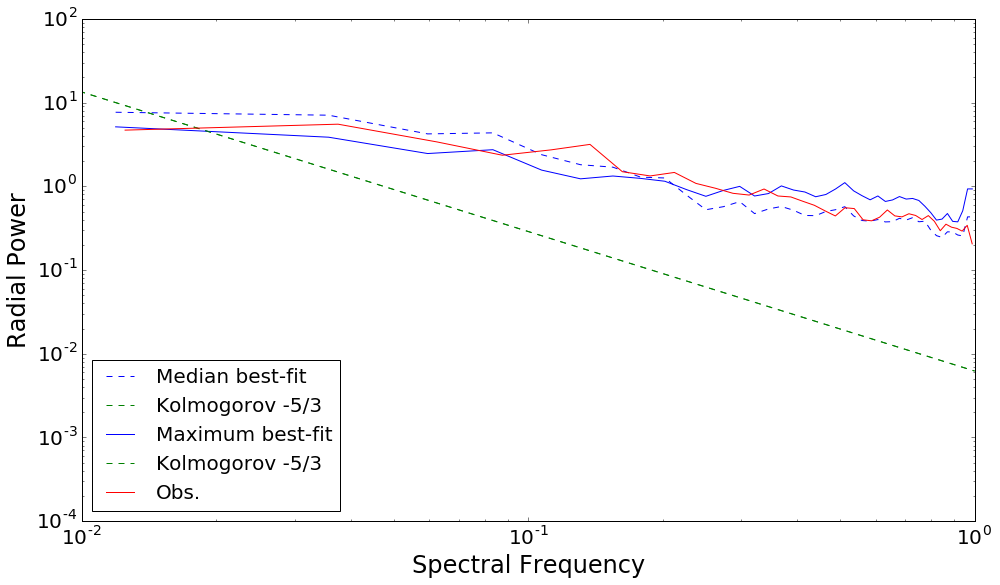

In [75]:
plt.figure(figsize=(16,9))
ww = np.array([0.31,0.37,0.32])
test_out(ww,label='Median best-fit',style='b--')
ww = np.array([0.4,0.32,0.28])
test_out(ww,label='Maximum best-fit')
v_tot, v_tpsd = tot_spec(n2068_vE,n2068_vB)
plt.plot(v_tpsd[0],v_tpsd[1],'r',label='Obs.')
plt.legend(loc='lower left',fontsize=20)

### B-field

/Library/Python/2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in true_divide


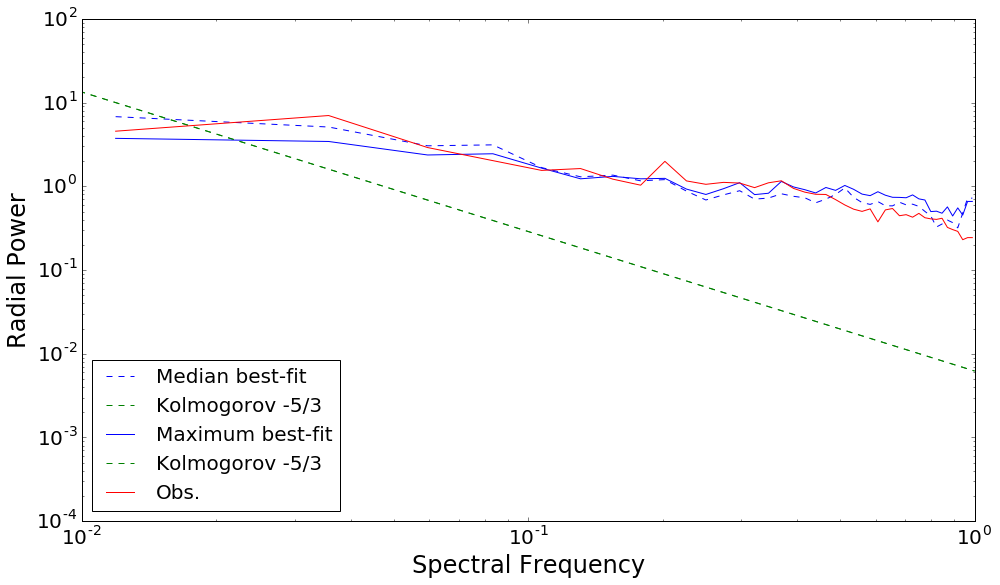

In [85]:
plt.figure(figsize=(16,9))
ww = np.array([0.38,0.31,0.31])
test_out(ww,data_p,label='Median best-fit',style='b--')
ww = np.array([0.4,0.4,0.2])
test_out(ww,data_p,label='Maximum best-fit')
p_tot, p_tpsd = tot_spec(n2068_E,n2068_B)
plt.plot(p_tpsd[0],p_tpsd[1],'r',label='Obs.')
plt.legend(loc='lower left',fontsize=20)

---
## The "propensity" towards large-scale structures (small frequencies)
CSD fits are bad

/Library/Python/2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in true_divide


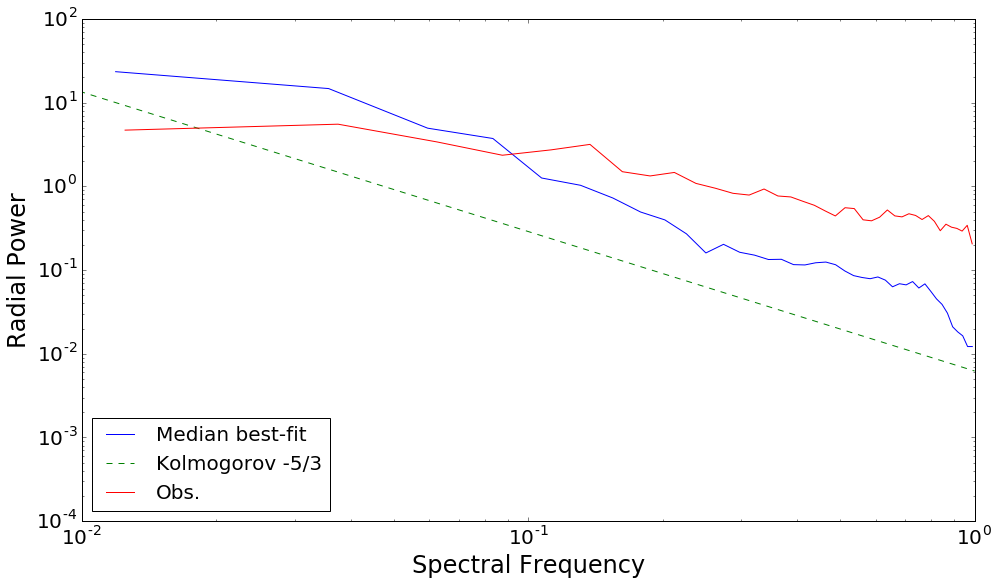

In [86]:
plt.figure(figsize=(16,9))
ww = np.array([0.2,0.23,0.57])
test_out(ww,data_p,label='Median best-fit',style='b-')
v_tot, v_tpsd = tot_spec(n2068_vE,n2068_vB)
plt.plot(v_tpsd[0],v_tpsd[1],'r',label='Obs.')
plt.legend(loc='lower left',fontsize=20)

running CSD with artificial time series to verify the hypothesis of the tendency...<br>
<br>
two "delta functions". Expected: FTs are flat so CSD should be flat, but...

/Library/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:767: UserWarning: nperseg = 256, is greater than input length = 101, using nperseg = 101
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


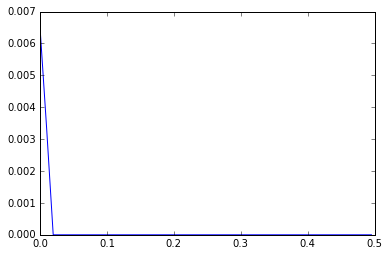

In [47]:
ff1,ff2 = [1]+[0]*100,[1]+[0]*100
f,pxy = signal.csd(ff1, ff2, return_onesided=True)
plt.plot(f,pxy)

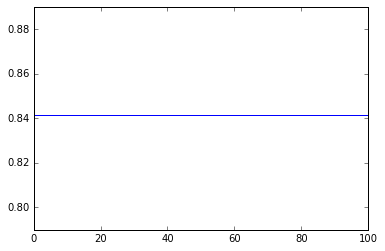

In [48]:
ft1 = np.fft.fft(np.sin(ff2))
plt.plot(ft1)